In [1]:
import cv2
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model, layers
from keras.models import load_model
from random import shuffle
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt


In [2]:
IMG_SIZE = 224
NUM_FRAME= 10

In [3]:
model_tf = load_model('./movie-model-fold10.h5')
model_tf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 4098      
Total params: 21,806,882
Trainable params: 4,098
Non-trainable params: 21,802,784
_________________________________________________________________


In [8]:
def create_dataset():
    dataset = []
    limit = 0


    for file in tqdm(os.listdir('./Hockey_fights/Dataframes/')):
        path = os.path.join('./Hockey_fights/Dataframes/', file)
        image = cv2.resize(cv2.imread(path), (IMG_SIZE, IMG_SIZE))
        if limit < 20057:
            dataset.append([image, np.array([1, 0])])
        elif limit >= 20057:
            dataset.append([image, np.array([0, 1])])
        
        limit += 1 
            
    
    shuffle(dataset)
    np.save('hockey_data_for_movie_model.npy', dataset)
    return dataset

In [9]:
data = create_dataset()

100%|██████████| 40056/40056 [01:30<00:00, 444.16it/s]
C:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [ ]:
data = np.load('hockey_data_for_movie_model.npy', allow_pickle=True)

In [10]:
X = np.array([i[0] for i in data]).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y = np.array([i[1] for i in data])
X = X.astype('float32')/255

In [11]:
model_tf.evaluate(x = X, y =Y, batch_size= 5, verbose = 1)

8012/8012 [==============================] - 315s 34ms/step - loss: 1.6586 - accuracy: 0.4966


[1.6585640907287598, 0.4965797960758209]

# Predictions

In [2]:
test_frame_folder_path = './Test_Hockey/'

In [3]:
data = []
c = 0
for files in os.listdir(test_frame_folder_path):
    path = os.path.join(test_frame_folder_path, files)
    image = cv2.resize(cv2.imread(path), (224, 224))
    if c < 5:
        data.append([np.array(image), [1, 0]])
    if c >= 5:
        data.append([np.array(image), [0, 1]])
    c += 1

In [4]:
np.asarray(data).shape

C:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(10, 2)

In [5]:
X = np.array([i[0] for i in data]).reshape(-1, 224, 224, 3)
Y = np.array([i[1] for i in data])

In [8]:
model_tf = load_model('./movie-model-softmax2.h5')

In [9]:
model_tf.predict(X, verbose= 1)

1/1 [==============================] - 9s 9s/step


array([[9.9905092e-01, 9.4903482e-04],
       [1.0000000e+00, 2.5296368e-34],
       [1.0000000e+00, 5.5200069e-20],
       [1.0000000e+00, 8.9506909e-11],
       [7.0626035e-02, 9.2937392e-01],
       [9.9999976e-01, 2.0259051e-07],
       [9.9999213e-01, 7.9245528e-06],
       [1.0000000e+00, 3.3921900e-26],
       [1.0000000e+00, 8.7764414e-12],
       [1.0000000e+00, 5.1079498e-23]], dtype=float32)

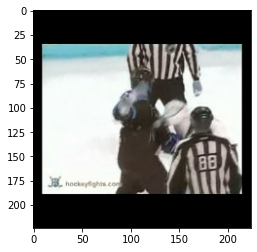

In [17]:
plt.imshow(X[9])